In [2]:
from pathlib import Path
import struct

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [38]:
logdir = Path("../log")
surrogate_file = logdir / "surrogate_step5_t_00017.struct"

params_reader = struct.Struct("NNN")
array_reader = None
t, dim, popsize = 0,0,0
x, lbda, p = np.zeros(0), np.zeros(0), np.zeros(0)

with surrogate_file.open("rb") as f:
    t, dim, popsize = params_reader.unpack(f.read(params_reader.size))
    
    lbda_s = (t + 1) * popsize
    p_s = dim + 1
    x_s = (t+1) * popsize * dim
    
    lbda = np.fromfile(f, np.double, lbda_s)
    p = np.fromfile(f, np.double, p_s)
    x = np.fromfile(f, np.double, x_s)

In [39]:
print("lambda=")
print(lbda)
print()

print("p=", p, "\n")

for j in range(t+1):
    for i in range(popsize):

        print(f"x[t={j}][i={i}] = ", x[j * popsize * dim + i * dim : j * popsize * dim + (i + 1) * dim])
    print()

lambda=
[-1.45460995e+00 -7.97759548e-03 -2.56629556e-03 -2.95620437e-03
 -6.39625346e-03 -1.83870092e-03  8.84536643e-06 -2.64083822e-03
 -2.00091495e-04  6.23594292e-01  5.58241139e-04 -2.43599916e-02
 -7.90508017e-03  2.41863358e-04  5.46939942e-03 -4.36153036e-06
 -2.26706267e-02 -2.56916263e-04  3.71483804e-02  5.20417634e-02
 -1.10282724e-02 -7.82249486e-03 -1.11613454e-02 -3.67699427e-02
  1.92725153e-01 -4.13201530e-02 -8.72616635e-05 -2.46691524e-02
  3.79180382e-04  5.23417254e-01 -6.93564824e-03 -1.49430862e-04
 -1.68438084e-02 -2.59262385e-04  2.18144555e-01 -5.15863158e-04
 -8.76148198e-05  2.76327709e-04 -9.98275389e-05 -1.70882476e-02
  1.86465189e-05 -1.25741484e-03 -2.27300721e-03 -1.26844845e-03
  1.90190218e-04 -8.29498774e-03 -1.73763717e-02  1.47685807e-04
  1.00087701e-01  4.86359800e-04 -2.30742507e-02  6.67743469e-05
 -2.07307230e-02  7.54612073e-02 -1.32249508e-03 -8.43771278e-05
 -1.92497883e-04 -2.35023075e-03  1.72299926e-04  1.42222925e-04
 -5.18460594e-05 

In [43]:
@np.vectorize
def surrogate(y1, y2):
    
    y = np.array([y1,y2])
    
    s = 0.
    
    r = 0
    for j in range(t+1):
        for i in range(popsize):
            u = x[j * popsize * dim + i * dim : j * popsize * dim + (i + 1) * dim]
            d = np.linalg.norm(u - y)
            s+= lbda[r] * d * d * d
            
            r+=1
    
    for i in range(dim):
        s += p[i+1] * y[i]
    
    s += p[0]
    
    return s

In [44]:
surrogate(1.5623, 5.2725)

array(-6.18325707)

In [45]:
def myfun(y1,y2):
    return (y1 - 2) * (y1 - 2) + (y2 - 5) * (y2 - 5);

<IPython.core.display.Javascript object>


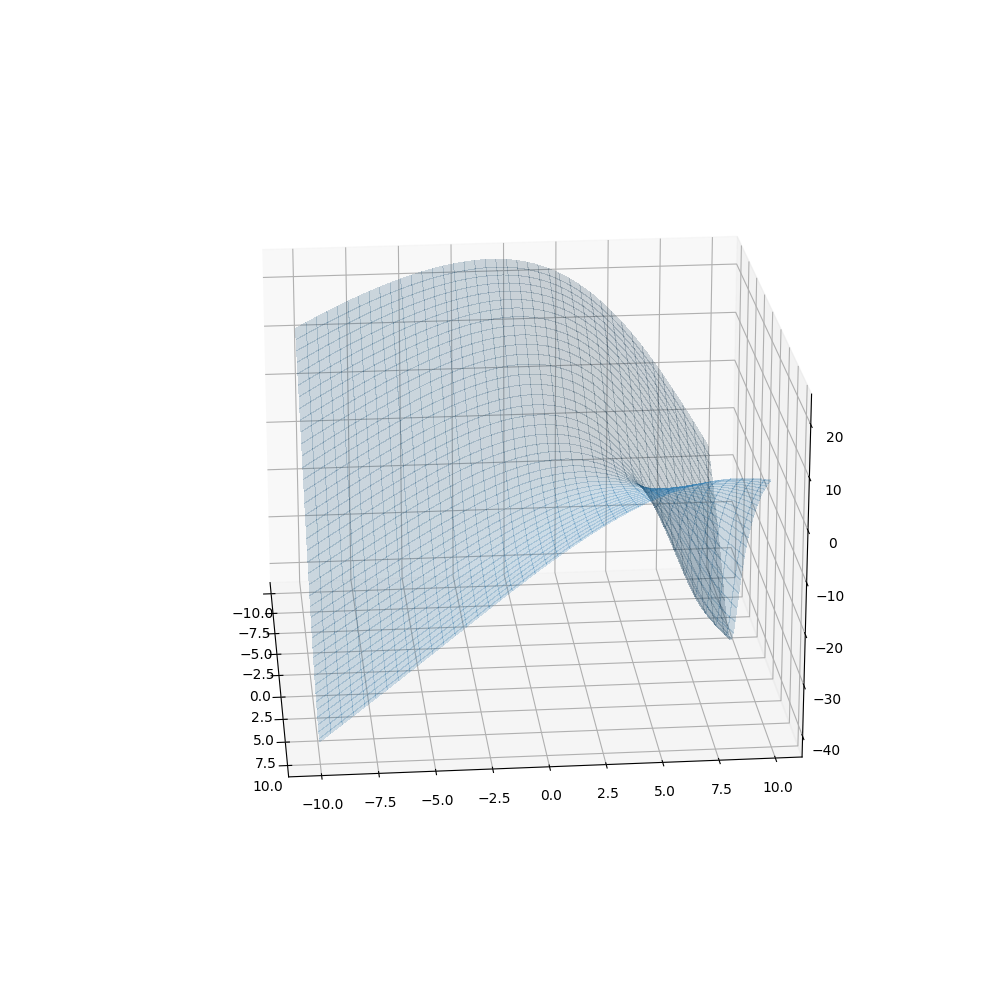

In [46]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)

Z1 = myfun(X,Y)
Z2 = surrogate(X,Y)

#surf = ax.plot_surface(X, Y, Z1, alpha=.2,
#                       linewidth=0, antialiased=False)

surf = ax.plot_surface(X, Y, Z2, alpha=.2,
                       linewidth=0, antialiased=False)